In [1]:
import math
from matplotlib.pyplot import * 
from numpy import *


def divided_difference(x,y):
    n = len(x)
    A = zeros((n,n+1))
    A[:,0] = x[:]
    A[:,1] = y[:]
    
    for j in range(2,n+1):
        for i in range(j-1,n):
            A[i,j] = (A[i,j-1]-A[i-1,j-1]) / (A[i,0]-A[i-j+1,0])
            
    p = zeros(n)
    
    for k in range(0,n):
        p[k] = A[k,k+1]
    return p

In [2]:
def poly(t,x,p):
    n = len(x)
    out = p[n-1]
    for i in range(n-2,-1,-1):
        out = out*(t-x[i]) + p[i]
    return out

In [3]:
#polynomials of degree n
n = [5, 20, 50, 100]
def f(x):
    #the function we approximate
    return (math.sin(x))/x

#each x[i] will store the values of degree n[i]
x = [[],[],[],[]]
y = [[],[],[],[]]

for i in range(len(n)):
    z = 0
    while z < (math.pi/2):
        #uniformly distributed points 
        z = z + (math.pi/2)/n[i]
        x[i].append(z)    
        y[i].append(f(z))
        
        

def f_multi(x):
    for i in range(len(x)):
        x[i] = math.sin(x[i])/x[i]
    return x

### Below are the n=5 and n=20 polynomials. They are fairly close in their approximations to the function defined as f(x) = sin(x)/x near the beginning, but at n=20 we are beginning to overfit the data. 

### Here the absolute error is defined as y(i) - y_approx(i). The error plot for all degrees is at the bottom

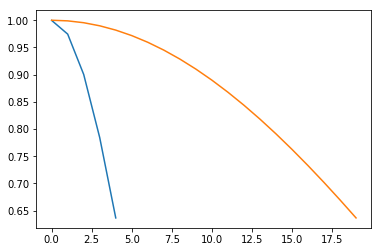

In [4]:
plot(poly(linspace(0,math.pi/2,5),x[0],divided_difference(x[0],y[0])))
plot(poly(linspace(0,math.pi/2,20),x[1],divided_difference(x[1],y[1])))

## Below is the 50 degree polynomial. We observe the Runge phenomenon more closely here. The tail ends begin to oscillate, even if only slightly, at the ends of the interval. The error begins to increase. 

## What's happening "under the hood" is that the magnitude of the derivatives is is increasing quite fast. As n increases, the intervals decrease as well, which amplifies the magnitude of the derivatives. 

## Again, y(i) - y_approx(i) diverges (to negative infinity) quite rapidly for n=50 as we should expect 

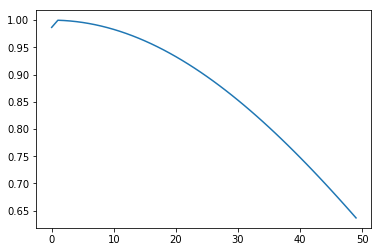

In [5]:
plot(poly(linspace(0,math.pi/2,50),x[2],divided_difference(x[2],y[2])))

## Below is the 100 degree polynomial. The tails diverge towards infinity even more aggressively here, and we have badly overfitted the data. The error goes to infinity as well. 

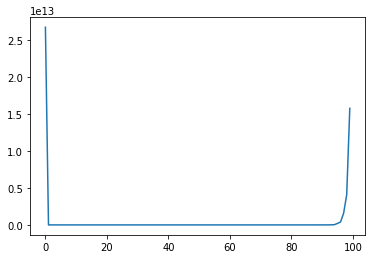

In [6]:
plot(poly(linspace(0,math.pi/2,100),x[3],divided_difference(x[3],y[3])))

### Error Plot

## The n=100 degree polynomial dwarfs the other errors

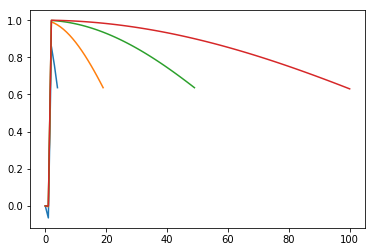

In [7]:
plot(array(f_multi(x[0]))-divided_difference(x[0],y[0]))
plot(array(f_multi(x[1]))-divided_difference(x[1],y[1]))
plot(array(f_multi(x[2]))-divided_difference(x[2],y[2]))
plot(array(f_multi(x[3]))-divided_difference(x[3],y[3]))
